In [1]:
import pandas as pd

# Load the data file into a DataFrame object
df = pd.read_sql('SELECT * FROM TRAIN', 'sqlite://///Users/karthik_swasaka/Downloads/dataset 6/data.db')

In [2]:
df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand,Price
0,0x2cd1,New,14.0,Inside_City,Outside_City,7.6,No,48.6,Morning,Sunny,No,7.36,6.84
1,0x10985,New,25.0,Outside_City,Inside_City,8.1,Yes,85.8,Midday,Sunny,No,6.42,8.71
2,0xae8d,New,19.0,Inside_City,Inside_City,13.1,No,86.0,Morning,Sunny,Yes,NaN,10.16
3,0x86ab,Regular,46.0,Inside_City,Inside_City,4.7,No,67.1,Midnight,Windy,No,6.19,13.44
4,0x8c,Inactive,52.0,Inside_City,Outside_City,2.6,No,39.8,Midday,Rainy,No,5.83,11.49


In [3]:
df.shape

(57202, 13)

In [4]:
df['Customer_Type'].value_counts()

New          22590
Passive      16789
Regular      11268
Inactive      5705
#R%$G&867      850
Name: Customer_Type, dtype: int64

In [5]:

df['Source_location_type'].value_counts()

Inside_City     36987
Outside_City    20215
Name: Source_location_type, dtype: int64

In [6]:
df['Destination_location_type'].value_counts()

Outside_City    31538
Inside_City     25664
Name: Destination_location_type, dtype: int64

In [7]:
df['Peak'].value_counts()

No         41368
Yes        13841
unknown     1993
Name: Peak, dtype: int64

In [8]:
df['Time'].value_counts()

Morning     17368
Evening     15893
Midday      10768
Night        9552
Midnight     3621
Name: Time, dtype: int64

In [9]:
df['Weather'].value_counts()

Sunny     18947
Windy     17169
Cloudy    12144
Rainy      5840
Stormy     3102
Name: Weather, dtype: int64

In [10]:
df['Is_weekend'].value_counts()

No     49803
Yes     7399
Name: Is_weekend, dtype: int64

In [11]:
df.isnull().sum()

ID                              0
Customer_Type                   0
Customer_Age                 1477
Source_location_type            0
Destination_location_type       0
Distance                     2413
Peak                            0
Traffic                         0
Time                            0
Weather                         0
Is_weekend                      0
Customer_demand              5162
Price                           0
dtype: int64

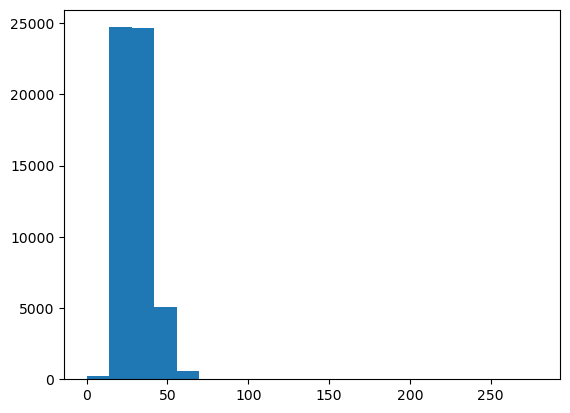

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['Customer_Age'], bins=20) # You can adjust the number of bins as needed
plt.show()

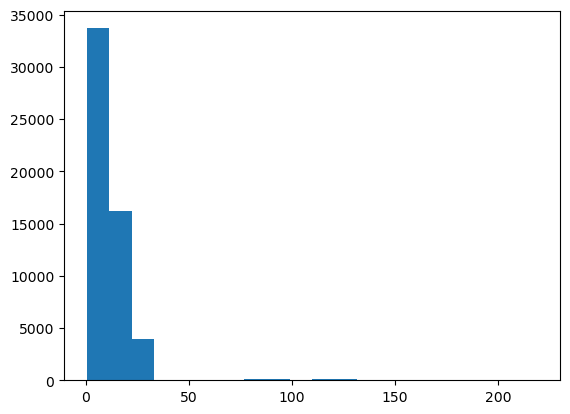

In [13]:
plt.hist(df['Distance'], bins = 20)
plt.show()

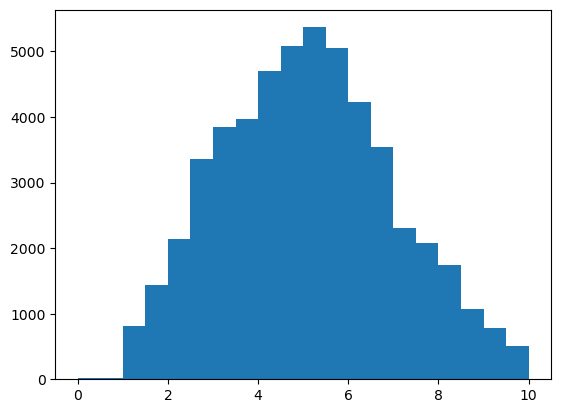

In [14]:
plt.hist(df['Customer_demand'], bins = 20)
plt.show()

In [15]:
df['Traffic'] = pd.to_numeric(df['Traffic'], errors='coerce', downcast='integer')

In [16]:
# Calculate the mean for each feature
mean_feature1 = df['Customer_Age'].mean()
mean_feature2 = df['Distance'].mean()
mean_feature3 = df['Customer_demand'].mean()
mean_feature4 = df['Traffic'].mean()
# Replace NaN values with the means
df['Customer_Age'].fillna(mean_feature1, inplace=True)
df['Distance'].fillna(mean_feature2, inplace=True)
df['Customer_demand'].fillna(mean_feature3, inplace=True)
df['Traffic'].fillna(mean_feature4, inplace=True)

In [17]:
df.isnull().sum()

ID                           0
Customer_Type                0
Customer_Age                 0
Source_location_type         0
Destination_location_type    0
Distance                     0
Peak                         0
Traffic                      0
Time                         0
Weather                      0
Is_weekend                   0
Customer_demand              0
Price                        0
dtype: int64

In [18]:
df.columns

Index(['ID', 'Customer_Type', 'Customer_Age', 'Source_location_type',
       'Destination_location_type', 'Distance', 'Peak', 'Traffic', 'Time',
       'Weather', 'Is_weekend', 'Customer_demand', 'Price'],
      dtype='object')

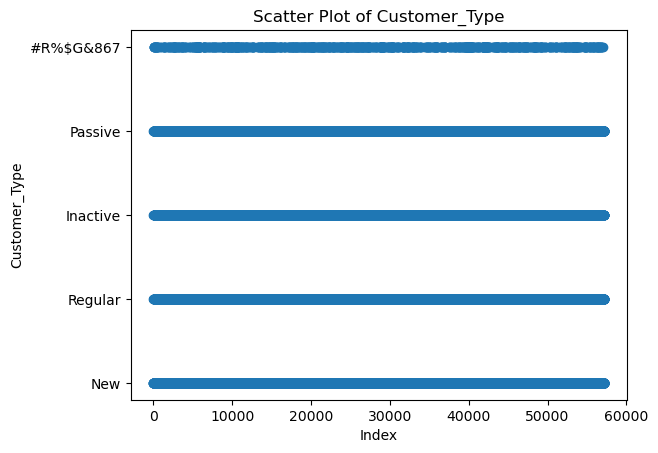

In [19]:
feature_to_analyze = 'Customer_Type'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

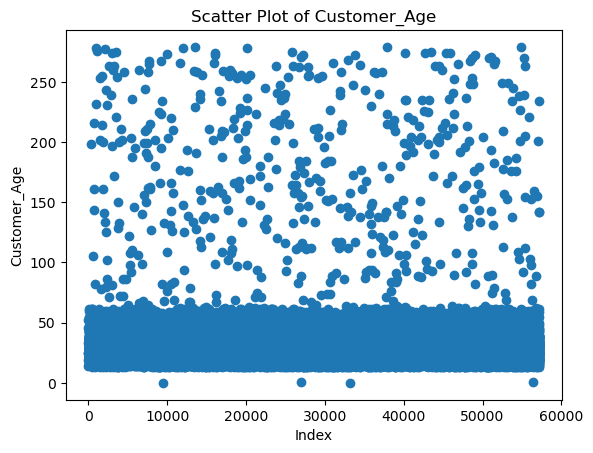

In [20]:
feature_to_analyze = 'Customer_Age'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

In [21]:
# 1. Identify and remove outliers
lower_bound = 12
upper_bound = 60

# 2. Handle outliers
# You can handle outliers in several ways, such as replacing them with a specific value or imputing them.

# Example: Replace outliers with the nearest bound
df['Customer_Age'] = df['Customer_Age'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


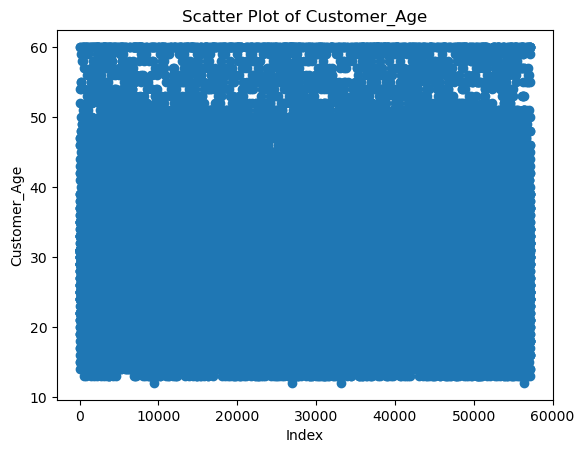

In [22]:
feature_to_analyze = 'Customer_Age'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

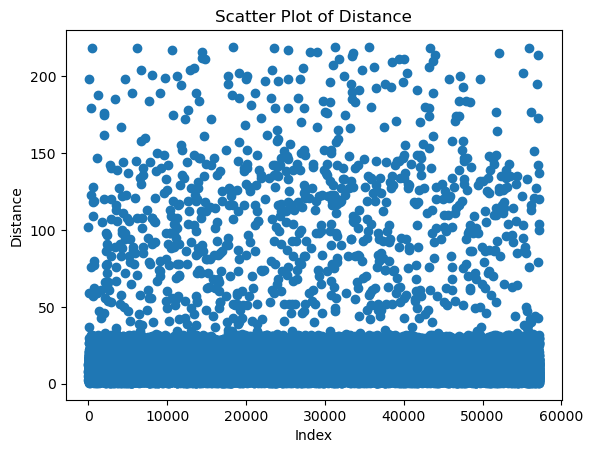

In [23]:
feature_to_analyze = 'Distance'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

In [24]:
# 1. Identify and remove outliers
lower_bound = 0
upper_bound = 30

# 2. Handle outliers
# You can handle outliers in several ways, such as replacing them with a specific value or imputing them.

# Example: Replace outliers with the nearest bound
df['Distance'] = df['Distance'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


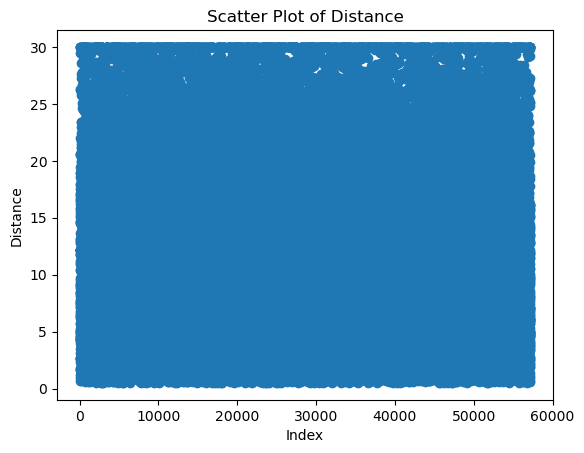

In [25]:
feature_to_analyze = 'Distance'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

In [26]:
df.isnull().sum()

ID                           0
Customer_Type                0
Customer_Age                 0
Source_location_type         0
Destination_location_type    0
Distance                     0
Peak                         0
Traffic                      0
Time                         0
Weather                      0
Is_weekend                   0
Customer_demand              0
Price                        0
dtype: int64

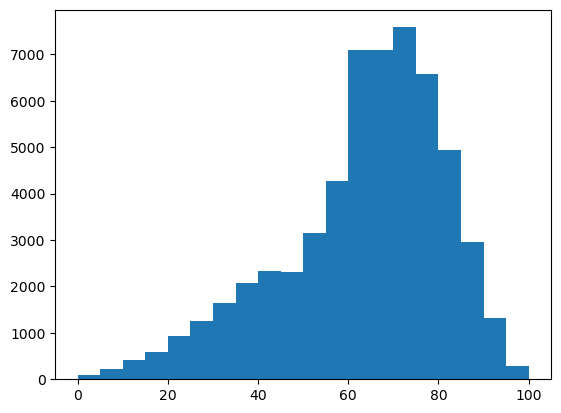

In [27]:
plt.hist(df['Traffic'], bins = 20)
plt.show()

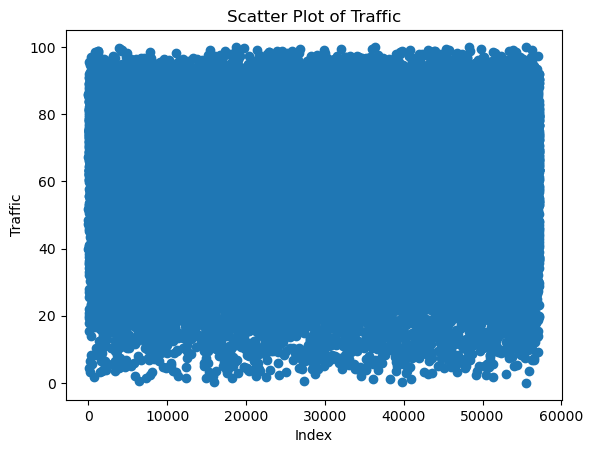

In [28]:
feature_to_analyze = 'Traffic'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

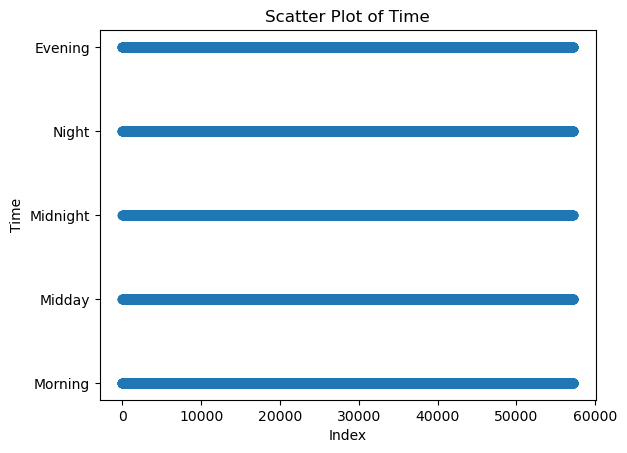

In [29]:
feature_to_analyze = 'Time'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

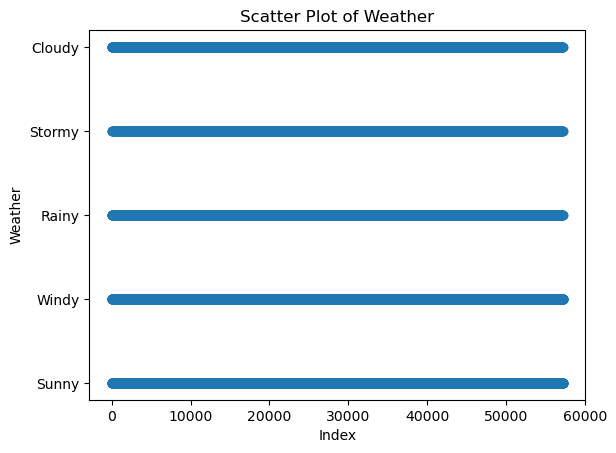

In [30]:
feature_to_analyze = 'Weather'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

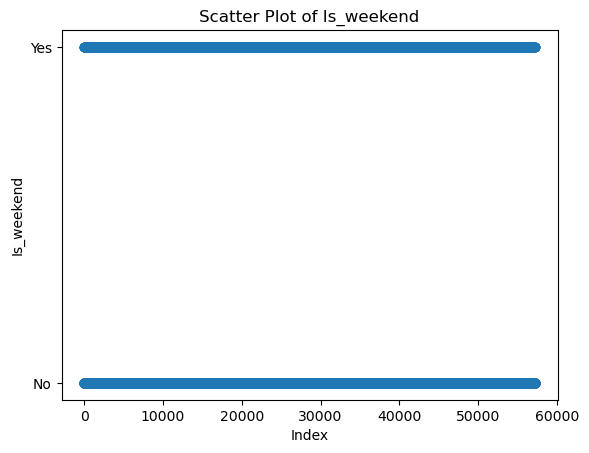

In [31]:
feature_to_analyze = 'Is_weekend'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

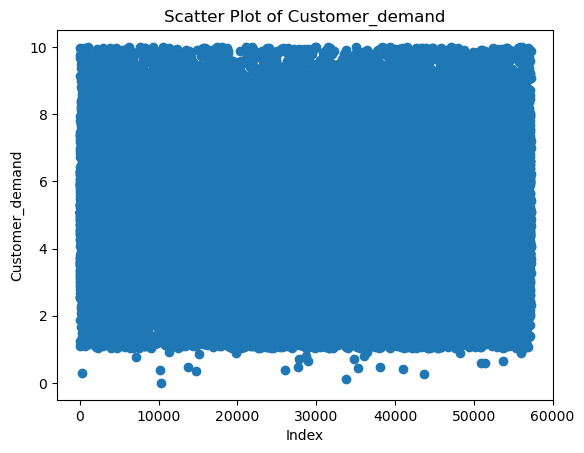

In [32]:
feature_to_analyze = 'Customer_demand'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

In [33]:
# 1. Identify and remove outliers
lower_bound = 1
upper_bound = 10

# 2. Handle outliers
# You can handle outliers in several ways, such as replacing them with a specific value or imputing them.

# Example: Replace outliers with the nearest bound
df['Customer_demand'] = df['Customer_demand'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


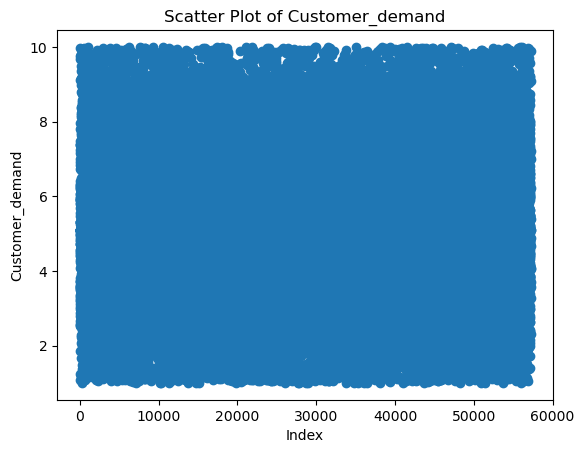

In [34]:
feature_to_analyze = 'Customer_demand'

# Create a scatter plot
plt.scatter(df.index, df[feature_to_analyze])
plt.xlabel('Index')
plt.ylabel(feature_to_analyze)
plt.title(f'Scatter Plot of {feature_to_analyze}')
plt.show()

In [35]:
df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand,Price
0,0x2cd1,New,14.0,Inside_City,Outside_City,7.6,No,48.6,Morning,Sunny,No,7.360000,6.84
1,0x10985,New,25.0,Outside_City,Inside_City,8.1,Yes,85.8,Midday,Sunny,No,6.420000,8.71
2,0xae8d,New,19.0,Inside_City,Inside_City,13.1,No,86.0,Morning,Sunny,Yes,5.097112,10.16
3,0x86ab,Regular,46.0,Inside_City,Inside_City,4.7,No,67.1,Midnight,Windy,No,6.190000,13.44
4,0x8c,Inactive,52.0,Inside_City,Outside_City,2.6,No,39.8,Midday,Rainy,No,5.830000,11.49


In [36]:
# Perform frequency or count encoding
count_encoded_ct = df['Customer_Type'].value_counts()
# Map the count values back to the original DataFrame
df['Customer_Type'] = df['Customer_Type'].map(count_encoded_ct)

count_encoded_SLT = df['Source_location_type'].value_counts()
# Map the count values back to the original DataFrame
df['Source_location_type'] = df['Source_location_type'].map(count_encoded_SLT)

count_encoded_DLT = df['Destination_location_type'].value_counts()
# Map the count values back to the original DataFrame
df['Destination_location_type'] = df['Destination_location_type'].map(count_encoded_DLT)

# Define a custom label encoding mapping
label_encoding_mapping_Peak = {
    "Yes": 2,  # Give more weightage to 5.0
    "No": 0,
    "unknown":1
}

# Perform label encoding using the custom mapping
df['Peak'] = df['Peak'].map(label_encoding_mapping_Peak)

label_encoding_mapping_weekend = {
    "Yes": 2,  # Give more weightage to 5.0
    "No": 1,
}

df['Is_weekend'] = df['Is_weekend'].map(label_encoding_mapping_weekend)

label_encoding_mapping_time = {
    "Morning": 5,  # Give more weightage to 5.0
    "Midday": 1,
    "Evening":4,
    "Night":2,
    "Midnight":3 
}

df['Time'] = df['Time'].map(label_encoding_mapping_time)

label_encoding_mapping_Weather = {
    "Sunny": 1,  # Give more weightage to 5.0
    "Windy": 2,
    "Cloudy":3,
    "Rainy":4,
    "Stormy":5 
}

df['Weather'] = df['Weather'].map(label_encoding_mapping_Weather)

df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand,Price
0,0x2cd1,22590,14.0,36987,31538,7.6,0,48.6,5,1,1,7.360000,6.84
1,0x10985,22590,25.0,20215,25664,8.1,2,85.8,1,1,1,6.420000,8.71
2,0xae8d,22590,19.0,36987,25664,13.1,0,86.0,5,1,2,5.097112,10.16
3,0x86ab,11268,46.0,36987,25664,4.7,0,67.1,3,2,1,6.190000,13.44
4,0x8c,5705,52.0,36987,31538,2.6,0,39.8,1,4,1,5.830000,11.49


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57202 entries, 0 to 57201
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         57202 non-null  object 
 1   Customer_Type              57202 non-null  int64  
 2   Customer_Age               57202 non-null  float64
 3   Source_location_type       57202 non-null  int64  
 4   Destination_location_type  57202 non-null  int64  
 5   Distance                   57202 non-null  float64
 6   Peak                       57202 non-null  int64  
 7   Traffic                    57202 non-null  float64
 8   Time                       57202 non-null  int64  
 9   Weather                    57202 non-null  int64  
 10  Is_weekend                 57202 non-null  int64  
 11  Customer_demand            57202 non-null  float64
 12  Price                      57202 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usag

/var/folders/28/mr1d2vnd4hbc41d0kmz4xvb40000gn/T/ipykernel_4862/3226458222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Price'].drop('Price')


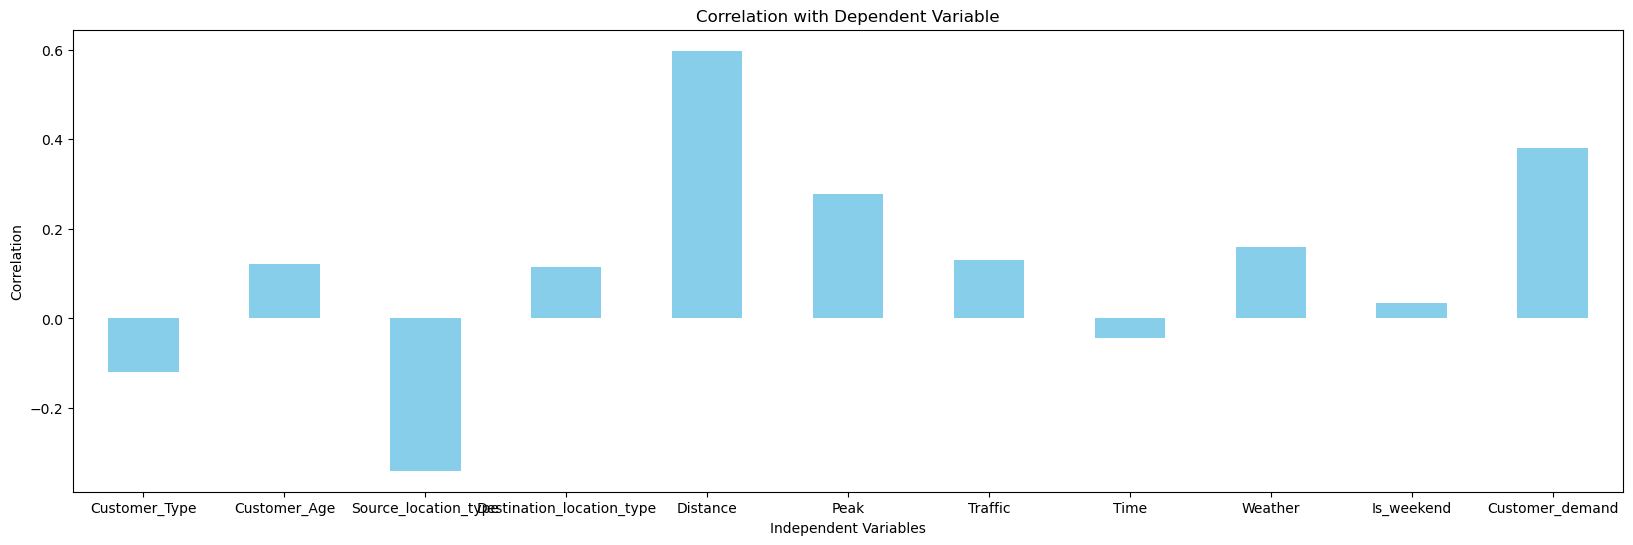

In [38]:
correlation = df.corr()['Price'].drop('Price')

# Create a bar graph to visualize the correlations
plt.figure(figsize=(20, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation with Dependent Variable')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=0)
plt.show()

In [39]:
df.isnull().sum()

ID                           0
Customer_Type                0
Customer_Age                 0
Source_location_type         0
Destination_location_type    0
Distance                     0
Peak                         0
Traffic                      0
Time                         0
Weather                      0
Is_weekend                   0
Customer_demand              0
Price                        0
dtype: int64

In [40]:
df['Peak'].value_counts()

0    41368
2    13841
1     1993
Name: Peak, dtype: int64

In [41]:
X = df.drop(columns=['ID','Price'])
y = df['Price']

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to compare
models = {
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2) Score: {r2}")
    print("")

# You can also add other evaluation metrics such as RMSE, MAE, etc.


Model: K-Nearest Neighbors
Mean Squared Error (MSE): 8.743732238440696
R-squared (R2) Score: 0.6128086720470426

Model: Support Vector Machine
Mean Squared Error (MSE): 19.60163763807862
R-squared (R2) Score: 0.1319971952281771

Model: Decision Tree
Mean Squared Error (MSE): 10.736960659033302
R-squared (R2) Score: 0.5245442172310683

Model: Random Forest
Mean Squared Error (MSE): 5.178264655119308
R-squared (R2) Score: 0.7706952690645221



In [42]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Model: {name}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print("")

Model: Random Forest
Mean Squared Error (MSE): 5.187609120811992
R-squared (R2) Score: 0.7702814759631443



In [43]:
import pandas as pd

# Load the data file into a DataFrame object
test_df = pd.read_sql('SELECT * FROM TEST', 'sqlite://///Users/karthik_swasaka/Downloads/dataset 6/data.db')

In [44]:
test_df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand
0,0x108fd,Passive,26.0,Inside_City,Outside_City,6.7,No,63.8,Night,Windy,No,5.81
1,0xaa0f,Passive,30.0,Inside_City,Outside_City,3.0,Yes,84.6,Evening,Windy,No,6.74
2,0x791d,Passive,24.0,Inside_City,Outside_City,6.8,No,63.6,Morning,Sunny,No,4.77
3,0x149c,New,20.0,Inside_City,Outside_City,6.0,No,####,Night,Rainy,No,1.97
4,0x1a77,Inactive,59.0,Inside_City,Inside_City,4.5,Yes,69.8,Morning,Sunny,No,9.68


In [45]:
test_df['Traffic'] = pd.to_numeric(test_df['Traffic'], errors='coerce', downcast='integer')

In [46]:
test_df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand
0,0x108fd,Passive,26.0,Inside_City,Outside_City,6.7,No,63.8,Night,Windy,No,5.81
1,0xaa0f,Passive,30.0,Inside_City,Outside_City,3.0,Yes,84.6,Evening,Windy,No,6.74
2,0x791d,Passive,24.0,Inside_City,Outside_City,6.8,No,63.6,Morning,Sunny,No,4.77
3,0x149c,New,20.0,Inside_City,Outside_City,6.0,No,NaN,Night,Rainy,No,1.97
4,0x1a77,Inactive,59.0,Inside_City,Inside_City,4.5,Yes,69.8,Morning,Sunny,No,9.68


In [47]:
test_df.isnull().sum()

ID                              0
Customer_Type                   0
Customer_Age                  317
Source_location_type            0
Destination_location_type       0
Distance                      494
Peak                            0
Traffic                       251
Time                            0
Weather                         0
Is_weekend                      0
Customer_demand              1113
dtype: int64

In [48]:
# Calculate the mean for each feature
mean_feature1 = test_df['Customer_Age'].mean()
mean_feature2 = test_df['Distance'].mean()
mean_feature3 = test_df['Customer_demand'].mean()
mean_feature4 = test_df['Traffic'].mean()
# Replace NaN values with the means
test_df['Customer_Age'].fillna(mean_feature1, inplace=True)
test_df['Distance'].fillna(mean_feature1, inplace=True)
test_df['Customer_demand'].fillna(mean_feature1, inplace=True)
test_df['Traffic'].fillna(mean_feature1, inplace=True)

In [49]:
test_df.isnull().sum()

ID                           0
Customer_Type                0
Customer_Age                 0
Source_location_type         0
Destination_location_type    0
Distance                     0
Peak                         0
Traffic                      0
Time                         0
Weather                      0
Is_weekend                   0
Customer_demand              0
dtype: int64

In [50]:
# 1. Identify and remove outliers
lower_bound = 12
upper_bound = 60

# 2. Handle outliers
# You can handle outliers in several ways, such as replacing them with a specific value or imputing them.

# Example: Replace outliers with the nearest bound
test_df['Customer_Age'] = test_df['Customer_Age'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))



# 1. Identify and remove outliers
lower_bound = 0
upper_bound = 30

# 2. Handle outliers
# You can handle outliers in several ways, such as replacing them with a specific value or imputing them.

# Example: Replace outliers with the nearest bound
test_df['Distance'] = test_df['Distance'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))




# 1. Identify and remove outliers
lower_bound = 1
upper_bound = 10

# 2. Handle outliers
# You can handle outliers in several ways, such as replacing them with a specific value or imputing them.

# Example: Replace outliers with the nearest bound
test_df['Customer_demand'] = test_df['Customer_demand'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


In [51]:
test_df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand
0,0x108fd,Passive,26.0,Inside_City,Outside_City,6.7,No,63.800000,Night,Windy,No,5.81
1,0xaa0f,Passive,30.0,Inside_City,Outside_City,3.0,Yes,84.600000,Evening,Windy,No,6.74
2,0x791d,Passive,24.0,Inside_City,Outside_City,6.8,No,63.600000,Morning,Sunny,No,4.77
3,0x149c,New,20.0,Inside_City,Outside_City,6.0,No,30.720609,Night,Rainy,No,1.97
4,0x1a77,Inactive,59.0,Inside_City,Inside_City,4.5,Yes,69.800000,Morning,Sunny,No,9.68


In [52]:
# Perform frequency or count encoding
count_encoded = test_df['Customer_Type'].value_counts()
# Map the count values back to the original DataFrame
test_df['Customer_Type'] = test_df['Customer_Type'].map(count_encoded)

count_encoded = test_df['Source_location_type'].value_counts()
# Map the count values back to the original DataFrame
test_df['Source_location_type'] = test_df['Source_location_type'].map(count_encoded)

count_encoded = test_df['Destination_location_type'].value_counts()
# Map the count values back to the original DataFrame
test_df['Destination_location_type'] = test_df['Destination_location_type'].map(count_encoded)

# Define a custom label encoding mapping
test_label_encoding_mapping_Peak = {
    "Yes": 2,  # Give more weightage to 5.0
    "No": 0,
    "unknown":1
}

# Perform label encoding using the custom mapping
test_df['Peak'] = test_df['Peak'].map(test_label_encoding_mapping_Peak)

test_label_encoding_mapping_weekend = {
    "Yes": 2,  # Give more weightage to 5.0
    "No": 1,
}

test_df['Is_weekend'] = test_df['Is_weekend'].map(test_label_encoding_mapping_weekend)

test_label_encoding_mapping_time = {
    "Morning": 5,  # Give more weightage to 5.0
    "Midday": 1,
    "Evening":4,
    "Night":2,
    "Midnight":3 
}

test_df['Time'] = test_df['Time'].map(test_label_encoding_mapping_time)

test_label_encoding_mapping_Weather = {
    "Sunny": 1,  # Give more weightage to 5.0
    "Windy": 2,
    "Cloudy":3,
    "Rainy":4,
    "Stormy":5 
}

test_df['Weather'] = test_df['Weather'].map(test_label_encoding_mapping_Weather)

test_df.head()

,ID,Customer_Type,Customer_Age,Source_location_type,Destination_location_type,Distance,Peak,Traffic,Time,Weather,Is_weekend,Customer_demand
0,0x108fd,3697,26.0,8127,6877,6.7,0,63.800000,2,2,1,5.81
1,0xaa0f,3697,30.0,8127,6877,3.0,2,84.600000,4,2,1,6.74
2,0x791d,3697,24.0,8127,6877,6.8,0,63.600000,5,1,1,4.77
3,0x149c,4834,20.0,8127,6877,6.0,0,30.720609,2,4,1,1.97
4,0x1a77,1298,59.0,8127,5595,4.5,2,69.800000,5,1,1,9.68


In [53]:
test_df.isnull().sum()

ID                           0
Customer_Type                0
Customer_Age                 0
Source_location_type         0
Destination_location_type    0
Distance                     0
Peak                         0
Traffic                      0
Time                         0
Weather                      0
Is_weekend                   0
Customer_demand              0
dtype: int64

In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12472 entries, 0 to 12471
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         12472 non-null  object 
 1   Customer_Type              12472 non-null  int64  
 2   Customer_Age               12472 non-null  float64
 3   Source_location_type       12472 non-null  int64  
 4   Destination_location_type  12472 non-null  int64  
 5   Distance                   12472 non-null  float64
 6   Peak                       12472 non-null  int64  
 7   Traffic                    12472 non-null  float64
 8   Time                       12472 non-null  int64  
 9   Weather                    12472 non-null  int64  
 10  Is_weekend                 12472 non-null  int64  
 11  Customer_demand            12472 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.1+ MB


In [55]:
prediction = model.predict(test_df.drop(columns=['ID']))

In [56]:
# Create a DataFrame with 'ID' and 'Predictions' columns
output_df = pd.DataFrame({'ID': test_df['ID'], 'Price': prediction})

# Display the output DataFrame
output_df.head()

,ID,Price
0,0x108fd,8.6908
1,0xaa0f,12.1518
2,0x791d,5.6866
3,0x149c,6.1855
4,0x1a77,10.7340


In [57]:
# Save the output DataFrame to a CSV file
output_file = "Dynamic_pricing.csv"
output_df.to_csv(output_file, index=False)

print(f"DataFrame saved to {output_file}")

DataFrame saved to Dynamic_pricing.csv
